In [4]:
import numpy as np
import math
from datascience import *
import pandas as pd
import matplotlib
import json
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [5]:
twitter_data_df = pd.read_csv('twcs.csv')

In [8]:
twitter_data_df

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [32]:
company_convos = {}
company_convos_no_at = {}
count = 0;
for rows in twitter_data_df.iterrows():
    #flag = false # false if customer, true if company
    
    # ignore messages without @ for now...
    if rows[1][4][0] != "@":
        continue
    # takes too long to load everything 
    count += 1
    if count > 500:
        break
    try: 
        # if message from customer
        #print("customer: ", str(int(rows[1][1])))
        cust_id = str(int(rows[1][1]))
        index = -1 # index of space for company name
        for i in range(len(rows[1][4])):
            if rows[1][4][i] == " ":
                index = i
                #print(index)
                break
        company_name = rows[1][4][1:index] 
        #print(company_name)
        #break
    except: 
        # if message from company
        #flag = true
        company_name = rows[1][1]
        cust_id = str(rows[1][4][1:7])
        index = 7
        
    if company_name in company_convos:
        customer_dict = company_convos.get(company_name)
        customer_dict_no_at = company_convos_no_at.get(company_name)
        
        
        if cust_id in customer_dict:
            customer_dict[cust_id].append(rows[1][4])   
            
        else:
            customer_dict[cust_id] = [rows[1][4]] 
            
            
        if cust_id in customer_dict_no_at:
            customer_dict_no_at[cust_id].append(rows[1][4][index:])   
        else:
            customer_dict_no_at[cust_id] = [rows[1][4][index:]] 
            
    else:
        company_convos[company_name] = {}
        company_convos[company_name][cust_id] = [rows[1][4][index:]] 
        
        company_convos_no_at[company_name] = {}
        company_convos_no_at[company_name][cust_id] = [rows[1][4][index:]] 
        
        
    
            
    

{'sprintcare': {'115712': ['@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.',
   '@sprintcare and how do you propose we do that',
   '@sprintcare I have sent several private messages and no one is responding as usual',
   '@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.',
   '@sprintcare I did.',
   '@115712 Can you please send us a private message, so that I can gain further details about your account?',
   '@sprintcare is the worst customer service'],
  '115713': ['@115713 This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC',
   '@sprintcare You gonna magically change your connectivity for me and my whole family ? 🤥 💯',
   "@115713 We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",
   '@sprintcare Since I signed up with y

In [73]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/wyattowalsh/Desktop/SacHacks2018-87e63fa0cf3e.json"
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
tot_text = ' '.join(company_convos_no_at['sprintcare']['115712'][0:])
tot_document = types.Document(
    content=tot_text,
    type=enums.Document.Type.PLAIN_TEXT)
# Detects the sentiment of the text

sentiment = client.analyze_sentiment(document=tot_document).document_sentiment
sentiment_score_collection = []
sentiment_mag_collection = []
for company in company_convos:
    for customer in company_convos[company]:
        for sentence in company_convos[company][customer]:
            text = sentence
            document = types.Document(
                content = text,
                type=enums.Document.Type.PLAIN_TEXT)
            sentiment_score_collection = np.append(sentiment_score_collection,client.analyze_sentiment(document=document).document_sentiment.score )
            sentiment_mag_collection = np.append(sentiment_mag_collection,client.analyze_sentiment(document=document).document_sentiment.magnitude )



print('Text: {}'.format(tot_text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
sentiment_score_collection, sentiment_mag_collection

Text:  I understand. I would like to assist you. We would need to get you into a private secured link to further assist.  and how do you propose we do that  I have sent several private messages and no one is responding as usual  Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.  I did.  Can you please send us a private message, so that I can gain further details about your account?  is the worst customer service
Sentiment: -0.10000000149011612, 2.4000000953674316


(array([ 0.1       ,  0.1       , -0.69999999,  0.1       ,  0.        ,
         0.        , -0.89999998, -0.2       ,  0.1       ,  0.1       ,
        -0.1       ,  0.2       , -0.1       , -0.40000001, -0.1       ,
        -0.2       , -0.40000001,  0.        , -0.2       ,  0.        ,
        -0.40000001, -0.80000001, -0.30000001,  0.2       ,  0.        ,
         0.        ,  0.69999999,  0.30000001,  0.1       ,  0.40000001,
         0.1       , -0.40000001, -0.30000001, -0.2       ,  0.1       ,
         0.30000001, -0.2       ,  0.        , -0.69999999,  0.        ,
         0.40000001, -0.1       , -0.89999998,  0.1       ,  0.        ,
         0.        , -0.30000001,  0.        , -0.30000001, -0.89999998,
         0.        ,  0.        , -0.80000001,  0.40000001,  0.60000002,
        -0.30000001,  0.        , -0.80000001,  0.2       ,  0.30000001,
         0.80000001,  0.1       , -0.1       ,  0.1       , -0.1       ,
         0.        ,  0.        ,  0.2       ,  0.8

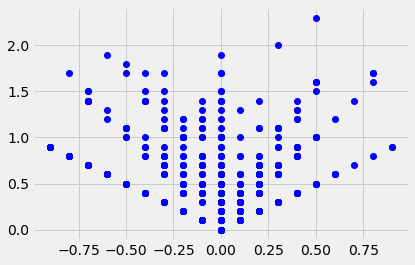

In [75]:
#Table().with_columns('Score',sentiment_score_collection,'Magnitude', sentiment_mag_collection).scatter('Score')
for i in range(len(sentiment_score_collection)):
    x = sentiment_score_collection[i]
    y = sentiment_mag_collection[i]
    plots.plot(x, y, 'bo')

In [56]:
sum(sentiment_score_collection)/sum(sentiment_mag_collection)

-0.5416666536022805

TypeError: Parameter to MergeFrom() must be instance of same class: expected google.cloud.language.v1.Document got str.